###

# ***Day-9***
![PKC_2023](day_10.jpg)

## **Subject: Pandas tips and tricks**
 **Author: Kaleem Ullah**\
 **Date:** 2023-01-09\
 **Email:** kaleemrao417@outlook.com

## **Contents**

[1- import-libraries-and-load-titanic-dataset](#import-libraries-and-load-titanic-dataset)\
[2- Expolre and view the titanic dataset](#expolre-and-view-the-titanic-dataset)\
[3- visualization-of-survivednot-survived-in-titanic](#visualization-of-survived-or-not-survived-in-titanic)\
[4- some-important-steps](#some-important-steps)\
[5- load-iris-dataset](#load-iris-dataset)\
[6- explore-and-view-iris-dataset](#explore-and-view-iris-dataset)

## **Import Libraries and Load Titanic Dataset**

In [3]:
import pandas as pd
import seaborn as sns
kashti = sns.load_dataset('titanic')

### **Expolre and view the titanic dataset**

In [4]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* **Columns explaination in Titanic dataset:**
  * **survived:**\
    How many people survived the titanic disaster(0 = No, 1 = Yes).
  * **pclass:**\
   The class of the ticket the passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd).
  * **sex:**\
     The passenger's gender (male or female).
  * **age:**\
    The passenger's age in years.
  * **sibsp:**\
  The number of siblings or spouses the passenger had aboard the Titanic.
  * **parch:**\
 The number of parents or children the passenger had aboard the Titanic.
  * **fare:**\
   The fare the passenger paid.
  * **embarked:**\
  The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).
  * **class:**\
  The class of the ticket the passenger purchased (1 = 1st, 2 = 2nd, 3 = 3rd).
  * **who:**\
   The passenger is man, woman or child.
  * **adult_male:**\
   The passenger is adult male or not(True = Yes, False = No).
  * **deck:** \
  The deck of the Titanic where the passenger was staying.
  * **embark_town:**\
 The town from where the passenger embarked.
  * **alive:**\
  The passenger survived or not.
  * **alone:**\
  The passenger was alone or not.

In [16]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
kashti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
kashti['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [19]:
kashti[['embark_town', 'survived']]

,embark_town,survived
0,Southampton,0
1,Cherbourg,1
2,Southampton,1
3,Southampton,1
4,Southampton,0
...,...,...
886,Southampton,0
887,Southampton,1
888,Southampton,0
889,Cherbourg,1


In [20]:
kashti.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

 **Q. What are NaN's and what are their importance in dataset?**
 
 ***Solution***
* **NaN** stands for **Not a Number**.\
  It is a special value that is used to represent missing values in a dataset.
* It is important to handle missing values in a dataset because most of the machine learning algorithms do not support missing values.

In [21]:
kashti.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [23]:
kashti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
kashti.groupby(['sex']).describe()

survived                                              pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... parch        fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

In [30]:
kashti.groupby(['sex']).describe().T

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

In [33]:
kashti.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [32]:
kashti.groupby(['survived', 'sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

In [34]:
kashti.groupby(['survived', 'sex', 'who'])['who'].count()

survived  sex     who  
0         female  child     15
                  woman     66
          male    child     19
                  man      449
1         female  child     28
                  woman    205
          male    child     21
                  man       88
Name: who, dtype: int64

### **Visualization of survived or not survived in Titanic**

<Figure size 1000x1000 with 0 Axes>

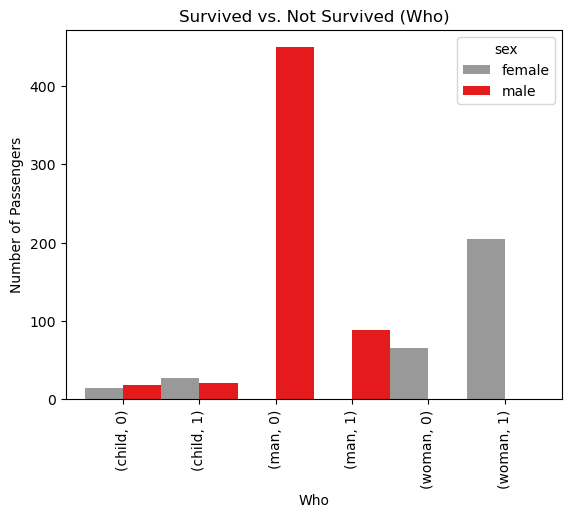

In [79]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(10, 10))
kashti.groupby(['who', 'survived',
                'sex'])['survived'].count().unstack().plot(kind='bar',
                                                           stacked=False, width=1, cmap=cm.Set1_r)
plt.xlabel('Who')
plt.ylabel('Number of Passengers')
plt.title('Survived vs. Not Survived (Who)')
plt.show()       

### **Some important Steps**

**Q. How many datasets are in sns.load_dataset( ) and how to fetch?**

***Solution***

In [8]:
print(len(sns.get_dataset_names()))

22


In [9]:
print((sns.get_dataset_names()))

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [10]:
sns.load_dataset('healthexp')

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


* **Export Titanic dataset**

In [ ]:
kashti.to_csv('titanic.csv')

* **Export dataset in another directory**

In [ ]:
kashti.to_csv('../day_8/titanic.csv')
# .. means go back one directory

* **Load dataset from directory**

In [24]:
df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* **Remove unnecessary Column**

In [27]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Load iris dataset**

In [13]:
phool = sns.load_dataset('iris')

### **Explore and View Iris dataset**

In [14]:
phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
phool.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
142,5.8,2.7,5.1,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
51,6.4,3.2,4.5,1.5,versicolor
22,4.6,3.6,1.0,0.2,setosa


In [7]:
phool.to_csv('iris.csv')